In [1]:
JSON_FILE = "../../results/ui2code/ui2code_validation.json"

In [3]:
import pandas as pd
import json

# Load the data
with open(JSON_FILE, 'r') as f:
    data = json.load(f)

flat_data = []
for i, experiment in enumerate(data):
    #if experiment["sampling"] == False:
        for bleu in experiment["bleus"]:

            flat_data.append({
                "bleu": bleu,
                "repetition_penalty": experiment["repetition_penalty"],
        }   )
df = pd.DataFrame(flat_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


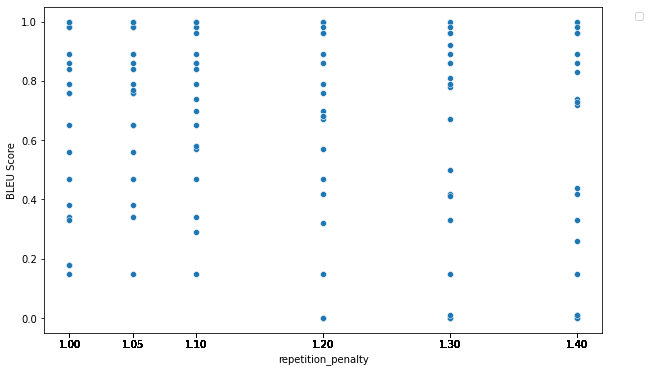

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='repetition_penalty', y='bleu')
#plt.title('BLEU scores per Experiment')
plt.ylabel('BLEU Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(ticks=df['repetition_penalty'])

plt.show()


In [5]:
!pip3 install prettytable

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [6]:
from prettytable import PrettyTable
import numpy as np

In [9]:
import numpy as np
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Repetition penalty", "BLEU: Mean", "Min", "Max", "Median", "80% ", "90% ", "Std"]

# Adding data to the table
for i, experiment in enumerate(data):
    repetition_penalty = experiment.get("repetition_penalty")
    bleus = experiment.get("bleus")

    mean_bleu = round(np.mean(bleus), 2)
    median_bleu = round(np.median(bleus), 2)
    std_bleu = round(np.std(bleus), 2)
    min_bleu = round(np.min(bleus), 2)
    max_bleu = round(np.max(bleus), 2)
    
    q80_bleu = round(np.percentile(bleus, 80), 2)
    q90_bleu = round(np.percentile(bleus, 90), 2)
    
    table.add_row([repetition_penalty, mean_bleu, min_bleu, max_bleu, median_bleu, q80_bleu, q90_bleu, std_bleu])

# Print the table
print(table)


+--------------------+------------+------+-----+--------+------+------+------+
| Repetition penalty | BLEU: Mean | Min  | Max | Median | 80%  | 90%  | Std  |
+--------------------+------------+------+-----+--------+------+------+------+
|        1.0         |    0.66    | 0.15 | 1.0 |  0.76  | 0.98 | 1.0  | 0.3  |
|        1.05        |    0.74    | 0.15 | 1.0 |  0.78  | 0.98 | 1.0  | 0.24 |
|        1.1         |    0.73    | 0.15 | 1.0 |  0.82  | 0.98 | 1.0  | 0.25 |
|        1.2         |    0.64    | 0.0  | 1.0 |  0.69  | 0.96 | 0.98 | 0.31 |
|        1.3         |    0.57    | 0.0  | 1.0 |  0.73  | 0.93 | 0.96 | 0.37 |
|        1.4         |    0.51    | 0.0  | 1.0 |  0.58  | 0.9  | 0.96 | 0.38 |
+--------------------+------------+------+-----+--------+------+------+------+


<Figure size 1008x432 with 0 Axes>

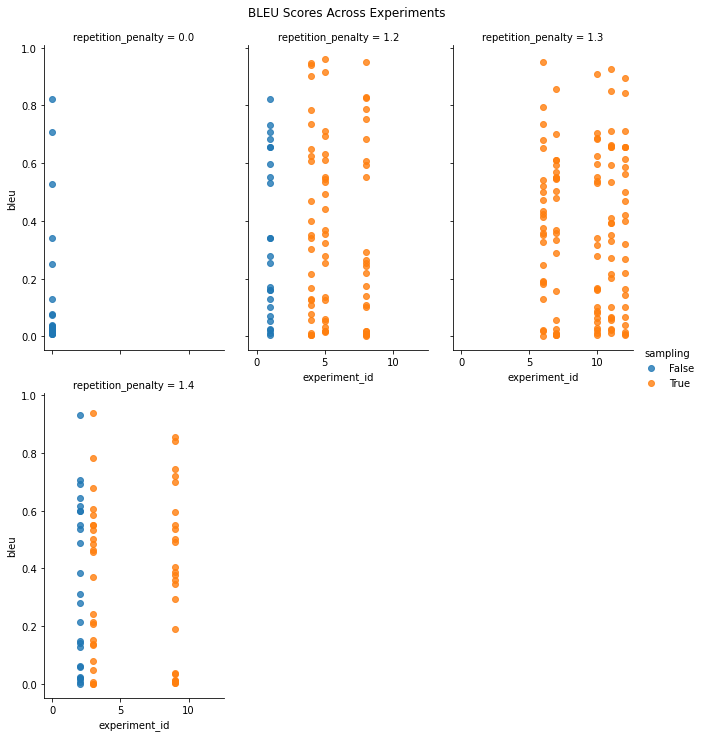

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Loading the data
with open(JSON_FILE, "r") as file:
    data = json.load(file)

# Preparing the DataFrame
rows = []
for idx, experiment in enumerate(data):
    for bleu_score in experiment['bleus']:
        row = {
            'experiment_id': idx,
            'bleu': bleu_score,
            'sampling': experiment['sampling'],
            'repetition_penalty': experiment['repetition_penalty']
        }
        # Adding optional keys if they exist
        for key in ['temperature', 'top_k', 'top_p']:
            row[key] = experiment.get(key, None)
        rows.append(row)

df = pd.DataFrame(rows)

# Adjusting Data Types
df['sampling'] = df['sampling'].astype('category')
df['experiment_id'] = df['experiment_id'].astype('category')

# Sample Visualization: Scatter plot of BLEU scores across experiments, 
# color-coded by sampling and faceted by repetition_penalty.
plt.figure(figsize=(14, 6))
sns.lmplot(
    data=df, 
    x='experiment_id', 
    y='bleu', 
    hue='sampling',
    col='repetition_penalty',
    fit_reg=False,
    aspect=0.6,
    col_wrap=3
)
plt.suptitle('BLEU Scores Across Experiments', y=1.02)
plt.show()


In [24]:
summary = df.drop_duplicates(subset='experiment_id')
display(summary[['experiment_id', 'sampling', 'repetition_penalty']])


,experiment_id,sampling,repetition_penalty
0,0,False,0.0
24,1,False,1.2
48,2,False,1.4
72,3,True,1.4
96,4,True,1.2
120,5,True,1.2
144,6,True,1.3
168,7,True,1.3
192,8,True,1.2
216,9,True,1.4


In [25]:
# Basic statistics per experiment
stats = df.groupby('experiment_id')['bleu'].describe()
print(stats)

               count      mean       std           min       25%       50%  \
experiment_id                                                                
0               24.0  0.136353  0.230864  7.103810e-03  0.013771  0.029877   
1               24.0  0.335997  0.277025  6.071965e-03  0.094462  0.267758   
2               24.0  0.340165  0.283613  7.662416e-06  0.061351  0.295016   
3               24.0  0.364032  0.267392  4.254752e-09  0.137842  0.414220   
4               24.0  0.373259  0.324258  3.387062e-03  0.099708  0.322044   
5               24.0  0.379920  0.289262  1.500933e-02  0.108248  0.361195   
6               24.0  0.396036  0.251557  4.466185e-06  0.190065  0.393262   
7               24.0  0.363937  0.266595  3.387062e-03  0.048112  0.423856   
8               24.0  0.351369  0.321627  7.224932e-04  0.080192  0.249604   
9               24.0  0.375490  0.286735  2.888598e-03  0.036511  0.382703   
10              24.0  0.321208  0.281395  6.071965e-03  0.076965

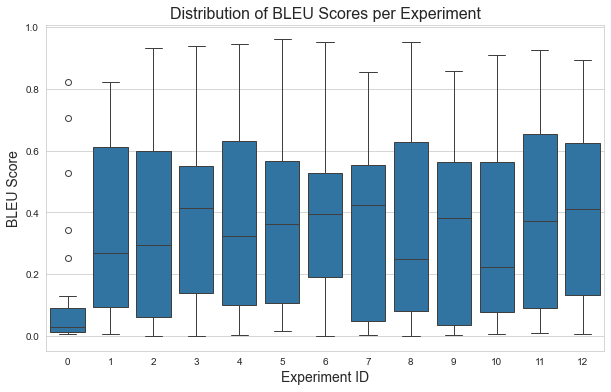

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experiment_id', y='bleu', data=df)

# Adding titles and labels
plt.title('Distribution of BLEU Scores per Experiment', fontsize=16)
plt.xlabel('Experiment ID', fontsize=14)
plt.ylabel('BLEU Score', fontsize=14)

# Show the plot
plt.show()
